<AxesSubplot:>

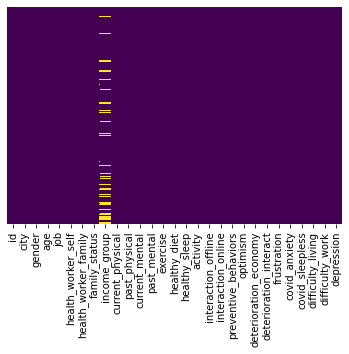

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("../Dataset/covid_mental_health_train.csv")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8610 non-null   int64  
 1   city                    8610 non-null   int64  
 2   gender                  8610 non-null   int64  
 3   age                     8610 non-null   int64  
 4   job                     8610 non-null   int64  
 5   health_worker_self      8610 non-null   int64  
 6   health_worker_family    8610 non-null   int64  
 7   family_status           8610 non-null   int64  
 8   income_group            7282 non-null   float64
 9   current_physical        8610 non-null   int64  
 10  past_physical           8610 non-null   int64  
 11  current_mental          8610 non-null   int64  
 12  past_mental             8610 non-null   int64  
 13  exercise                8610 non-null   int64  
 14  healthy_diet            8610 non-null   

In [5]:
df['income_group'].describe()

count    7282.000000
mean        4.308981
std         2.653107
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: income_group, dtype: float64

<AxesSubplot:xlabel='job', ylabel='income_group'>

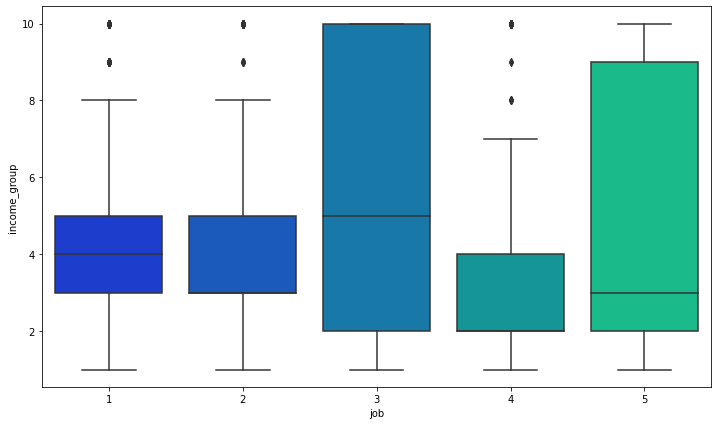

In [6]:
nf = df.sort_values(by='income_group')
income = nf['income_group']
job = nf['job']
plt.figure(figsize=(12, 7))
sns.boxplot(x='job',y='income_group',data=nf,palette='winter')

In [7]:
def impute_income(cols):
    Income = cols[0]
    Job = cols[1]
    
    if pd.isnull(Income):

        if Job == 1:
            return 4

        elif Job == 2:
            return 4
        
        elif Job == 3:
            return 5

        elif Job == 4:
            return 3
        
        else:
            return 3

    else:
        return Income

<AxesSubplot:>

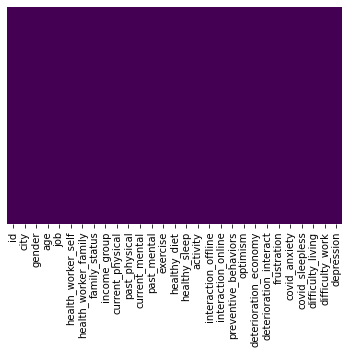

In [8]:
nf['income_group'] = nf[['income_group','job']].apply(impute_income,axis=1)
sns.heatmap(nf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
nf['income_group'].describe()

count    8610.000000
mean        4.258653
std         2.447805
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        10.000000
Name: income_group, dtype: float64

In [10]:
nf = nf.sort_values(by='id')
nf.tail(5)

,id,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,current_physical,...,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work,depression
7946,2146330748,2,2,27,1,2,2,2,4.0,2,...,6,7,1,1,1,6,4,1,2,0
3864,2146350672,2,1,20,3,2,2,1,10.0,2,...,4,2,6,6,4,4,4,4,6,0
4444,2146359296,7,2,56,4,2,2,1,10.0,2,...,7,4,4,6,5,5,5,5,4,0
5782,2146615920,5,2,40,1,2,2,1,2.0,2,...,5,1,4,1,1,1,7,2,1,0
4533,2147086898,1,2,58,1,2,2,2,3.0,2,...,7,4,6,1,1,5,2,1,6,0


In [11]:
labels = nf.pop('depression')

In [12]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(nf, labels, test_size= 0.2)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 70)
# rf.fit(x_train, y_train)
rf.fit(nf, labels)

RandomForestClassifier(n_estimators=70)

<AxesSubplot:>

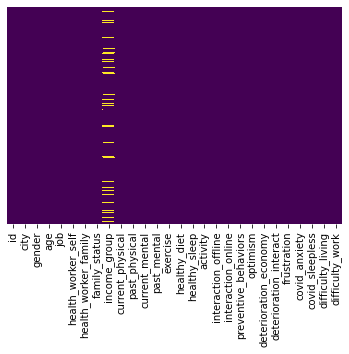

In [14]:
testf = pd.read_csv("../Dataset/covid_mental_health_test.csv")
sns.heatmap(testf.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#y_pred = rf.predict(x_test)
#y_pred = rf.predict(testf)

In [15]:
testf['income_group'] = testf[['income_group','job']].apply(impute_income,axis=1)
testf = testf.sort_values(by='id')

In [16]:
y_pred = rf.predict(testf)
samplef = pd.read_csv("../Dataset/covid_mental_health_sample_submission.csv")
samplef = samplef.sort_values(by='id')
y_test =  pd.merge(samplef, testf, on='id', how='left')
# y_test.drop(y_test.columns.difference(['id','depression']), 1, inplace=True)
y_test.head(4)

,id,depression,city,gender,age,job,health_worker_self,health_worker_family,family_status,income_group,...,interaction_online,preventive_behaviors,optimism,deterioration_economy,deterioration_interact,frustration,covid_anxiety,covid_sleepless,difficulty_living,difficulty_work
0,2022402,0.231742,2,1,23,1,2,2,1,1.0,...,3,4,4,4,4,4,4,4,4,4
1,3523390,0.493647,2,1,63,1,2,2,2,2.0,...,2,2,4,2,1,3,4,2,5,6
2,4175033,0.928596,1,2,51,1,2,2,2,2.0,...,3,2,4,1,1,4,7,3,5,1
3,4426710,0.919768,6,2,50,2,2,2,2,6.0,...,2,7,4,1,2,1,1,1,7,1


In [17]:
frames = [y_test, nf]
sample_submission = pd.concat(frames)
sample_submission.describe()
sample_submission.drop(sample_submission.columns.difference(['id','depression']), 1, inplace=True)
sample_submission.to_csv('../Dataset/sample_submission.csv',index= False)

In [39]:
y_test.drop(y_test.columns.difference(['id','depression']), 1, inplace=True)
truedata = y_test['depression'].to_numpy()
print(truedata[0:20])

[0.23174243 0.49364705 0.92859586 0.91976781 0.54339946 0.27146722
 0.45029229 0.94926411 0.0052105  0.97443365 0.43942953 0.32903936
 0.48075382 0.04676718 0.19508608 0.36173943 0.06589928 0.58758869
 0.27218844 0.58158278]


In [30]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(truedata, y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

ValueError: continuous format is not supported

In [341]:
#rf.score(x_test,y_test)

In [342]:
# n_estimators =[ 65, 66, 67, 68, 69, 71, 72, 73, 74, 75]
# train_results = []
# test_results = []

# for estimators in n_estimators:
#     rf = RandomForestClassifier(n_estimators = estimators, n_jobs = -1)
#     rf.fit(x_train, y_train)
#     train_pred = rf.predict(x_train)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#     roc_auc = auc(false_positive_rate,true_positive_rate)
#     train_results.append(roc_auc)
#     y_pred = rf.predict(x_test)
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#     roc_auc = auc(false_positive_rate,true_positive_rate)
#     test_results.append(roc_auc)
    
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(n_estimators, train_results, 'b', label = 'Train AUC')
# line2, = plt.plot(n_estimators, test_results, 'r', label = 'Test AUC')
# plt.legend(handler_map ={line1: HandlerLine2D(numpoints=2)})
# plt.xlabel('n_estimator')
# plt.ylabel('AUC score')
# plt.show()